In [123]:
%%HTML
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>

<a href="javascript:code_toggle()">[Toggle Code]</a>

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

# Young People Survey

![](intro.jpg)

In [125]:
responses = pd.read_csv('responses.csv')
responses[:4]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow


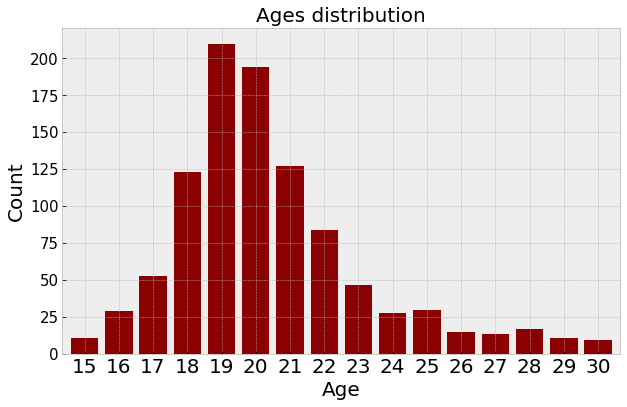

In [126]:
plt.figure(figsize=(10, 6))
responses.groupby('Age').size().plot.bar(
    width=0.8, color='darkred', rot=0)
plt.title('Ages distribution', size=20)
plt.xticks(range(16), range(15, 31), size=20)
plt.yticks(size=15)
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)
plt.show()

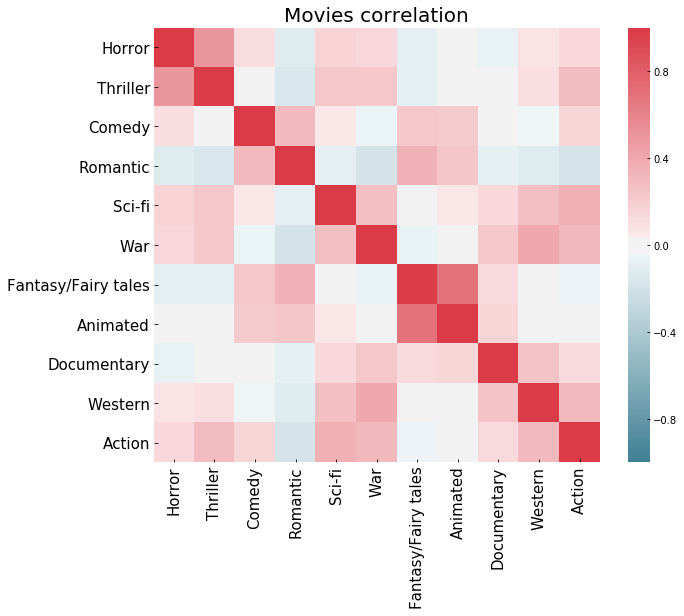

In [127]:
plt.figure(figsize=(10, 8))
corr = responses.loc[:, 'Horror':'Action'].corr('spearman')
palette = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1, cmap=palette)
plt.title('Movies correlation', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

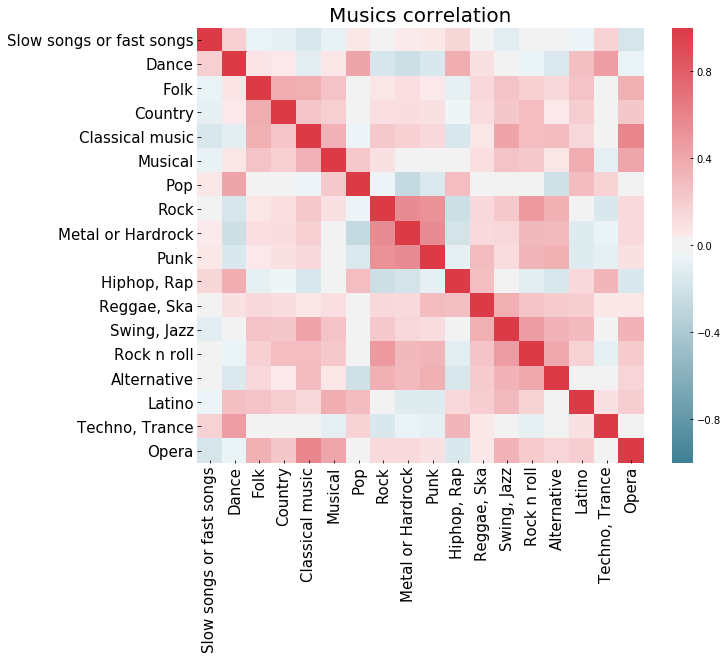

In [128]:
plt.figure(figsize=(10, 8))
corr = responses.loc[:, 'Slow songs or fast songs':'Opera'].corr('spearman')
palette = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1, cmap=palette)
plt.title('Musics correlation', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

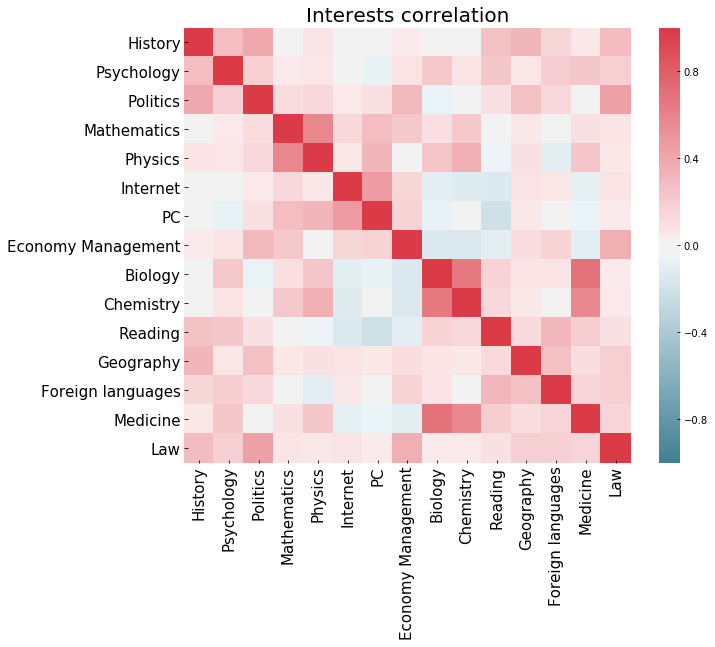

In [129]:
plt.figure(figsize=(10, 8))
corr = responses.loc[:, 'History':'Law'].corr('spearman')
palette = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1, cmap=palette)
plt.title('Interests correlation', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

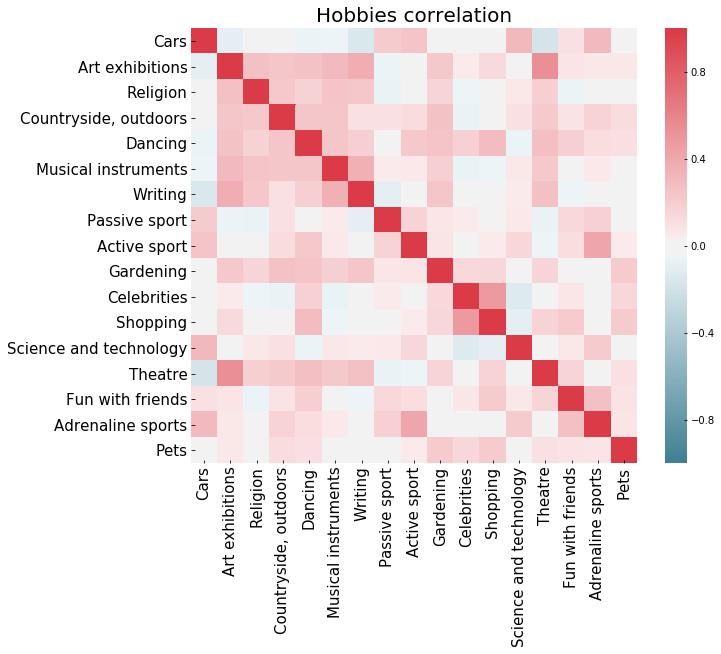

In [130]:
plt.figure(figsize=(10, 8))
corr = responses.loc[:, 'Cars':'Pets'].corr('spearman')
palette = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1, cmap=palette)
plt.title('Hobbies correlation', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

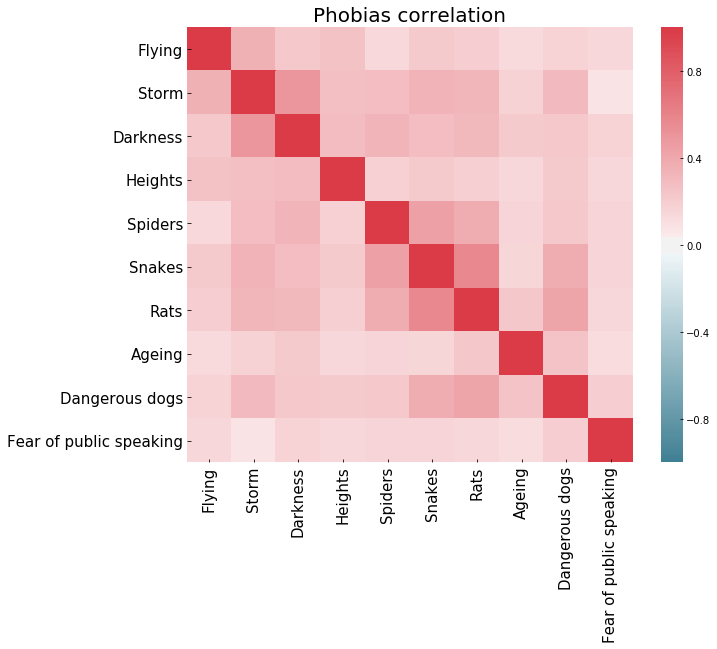

In [131]:
plt.figure(figsize=(10, 8))
corr = responses.loc[:, 'Flying':'Fear of public speaking'].corr('spearman')
palette = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1, cmap=palette)
plt.title('Phobias correlation', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

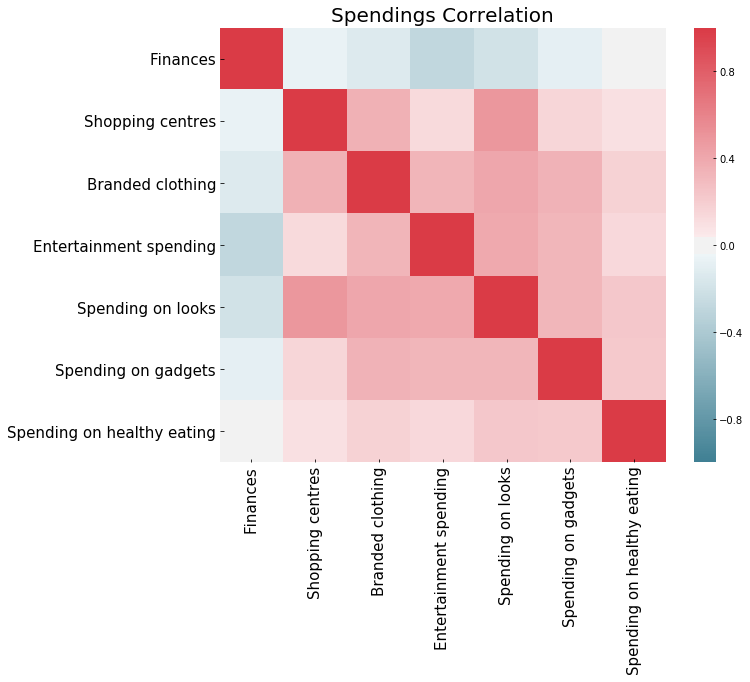

In [132]:
plt.figure(figsize=(10, 8))
corr = responses.loc[:, 'Finances':'Spending on healthy eating'].corr('spearman')
palette = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1, cmap=palette)
plt.title('Spendings Correlation', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

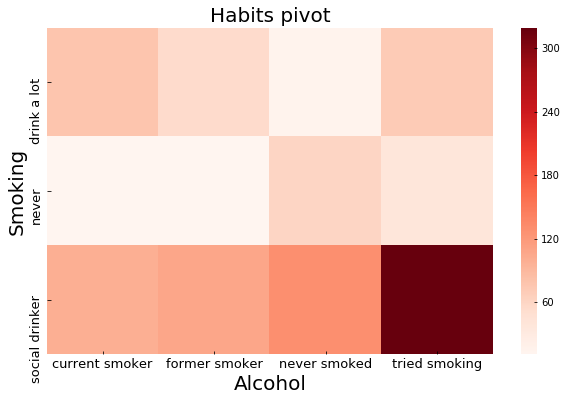

In [133]:
plt.figure(figsize=(10, 6))
pivot = responses.pivot_table(index='Alcohol', columns='Smoking', aggfunc='count', values='Music')
sns.heatmap(pivot, cmap='Reds')
plt.title('Habits pivot', size=20)
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Alcohol', size=20)
plt.ylabel('Smoking', size=20)
plt.show()

![](pyaterka.jpg)

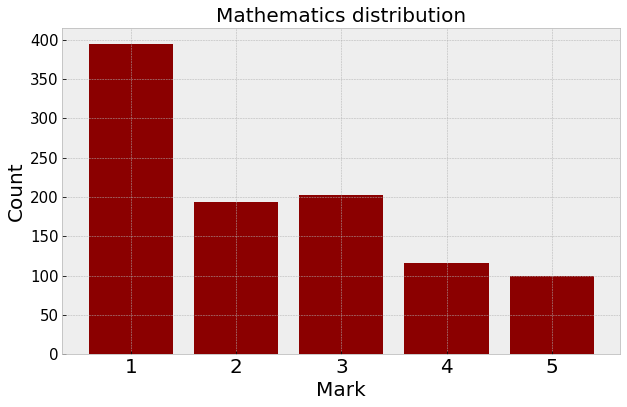

In [134]:
plt.figure(figsize=(10, 6))
responses.groupby('Mathematics').size().plot.bar(
    width=0.8, color='darkred', rot=0)
plt.xticks(range(5), range(1, 6), size=20)
plt.yticks(size=15)
plt.title('Mathematics distribution', size=20)
plt.xlabel('Mark', size=20)
plt.ylabel('Count', size=20)
plt.show()

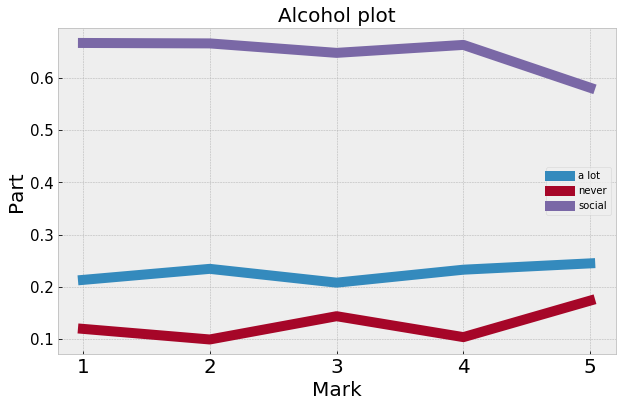

In [135]:
alcohol = [responses[responses['Mathematics'] == j].groupby(
    'Alcohol').size().values for j in range(1, 6)]
alcohol = np.vstack(alcohol).astype(float)
alcohol /= np.sum(alcohol, axis=1)[:, None]
plt.figure(figsize=(10, 6))
plt.plot(alcohol, linewidth=10)
plt.title('Alcohol plot', size=20)
plt.legend(['a lot', 'never', 'social'])
plt.xticks(range(0, 5), range(1, 6), size=20)
plt.yticks(size=15)
plt.xlabel('Mark', size=20)
plt.ylabel('Part', size=20)
plt.show()

In [136]:
young = responses[(responses['Mathematics']==5) | (responses['Mathematics']==1)]

In [137]:
var_of_interest = 'Mathematics'
#mapping = {var_of_interest: {1.0: 0, 5.0: 1}}
young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
young['Count'] = ''

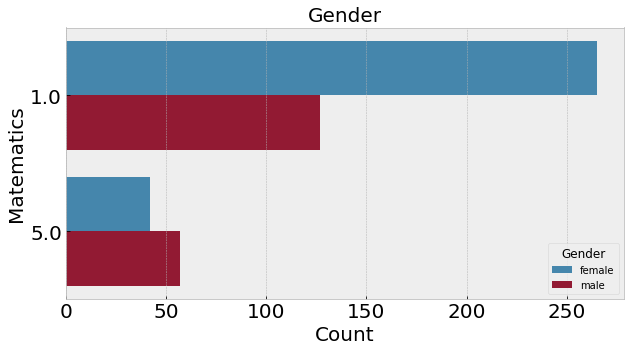

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5))
sns.countplot(y = var_of_interest, hue = 'Gender', data = young, ax = ax)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Gender', size=20)
plt.xlabel('Count', size=20)
plt.ylabel('Matematics', size=20)
plt.show()

In [139]:
display(young[young['Height']<70][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])
display(young[young['Weight']>120][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])
young.drop([676,992], inplace = True)

,Age,Height,Weight,Gender,Mathematics
676,20.0,62.0,55.0,female,1.0


,Age,Height,Weight,Gender,Mathematics
992,30.0,200.0,150.0,male,5.0


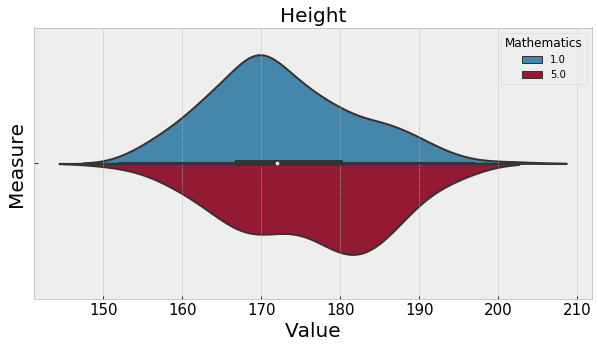

In [140]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
data = young.dropna(subset=['Height'])
sns.violinplot(x='Height', y = "Count", hue=var_of_interest, data=data, split=True, ax = ax)
plt.xticks(size=15)
plt.xlabel('Value', size=20)
plt.ylabel('Measure', size=20)
plt.title('Height', size=20)
plt.show()

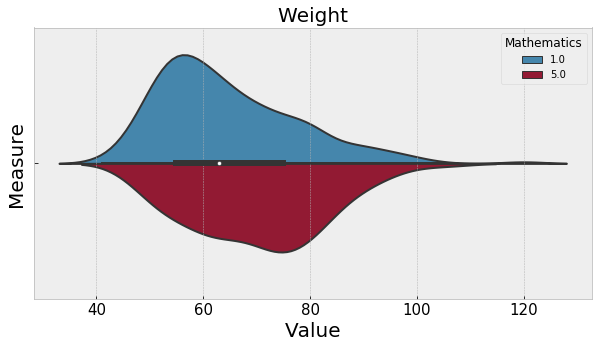

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
data = young.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y = "Count", hue=var_of_interest, data=data, split=True, ax = ax)
plt.ylabel('Measure', size=20)
plt.title('Weight', size=20)
plt.xlabel('Value', size=20)
plt.xticks(size=15)

plt.show()

In [142]:
import copy
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Correlation coefficient of the variables")
    g = sns.barplot(x=x, y=y,  ax = ax)
    ax.set_ylabel("Correlation coefficients")
    plt.xticks(rotation=45, size=20)
    plt.yticks(size=30)
    plt.xlabel('')
    plt.ylabel('')

def correlation_plot(var_of_interest, df_main, cat):
    def calc_corr(var_of_interest, df, cols, figsize, gamma):
        lbls = []
        vals = []
        for col in cols:
            corr = np.corrcoef(df[col], df[var_of_interest])[0,1]
            if abs(corr)>gamma:
                lbls.append(col)
                vals.append(corr)
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs['features'], corrs.corr_values, figsize)
        return corrs
    #imputing the set
    df = copy.deepcopy(df_main)
#    young[var_of_interest] = young[var_of_interest].apply(lambda s: 1 if s==5 else 0)
#    df.replace({1.0:0, 5.0:1}, inplace=True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    
    if not cat:
        #correlating non-categorical varibales
        cols_floats = [col for col in df.columns if df[col].dtype!='object']
        cols_floats.remove(var_of_interest)
        corrs_one = calc_corr(var_of_interest, df, cols_floats, (30,10), 0.15)
        plt.title('Order features correlation', size=30)        
    else:
        #correlating categorical variables
        cols_cats = [col for col in df.columns if df[col].dtype=='object']
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (30, 10), 0.05)
        plt.title('Categorical features correlation', size=30)


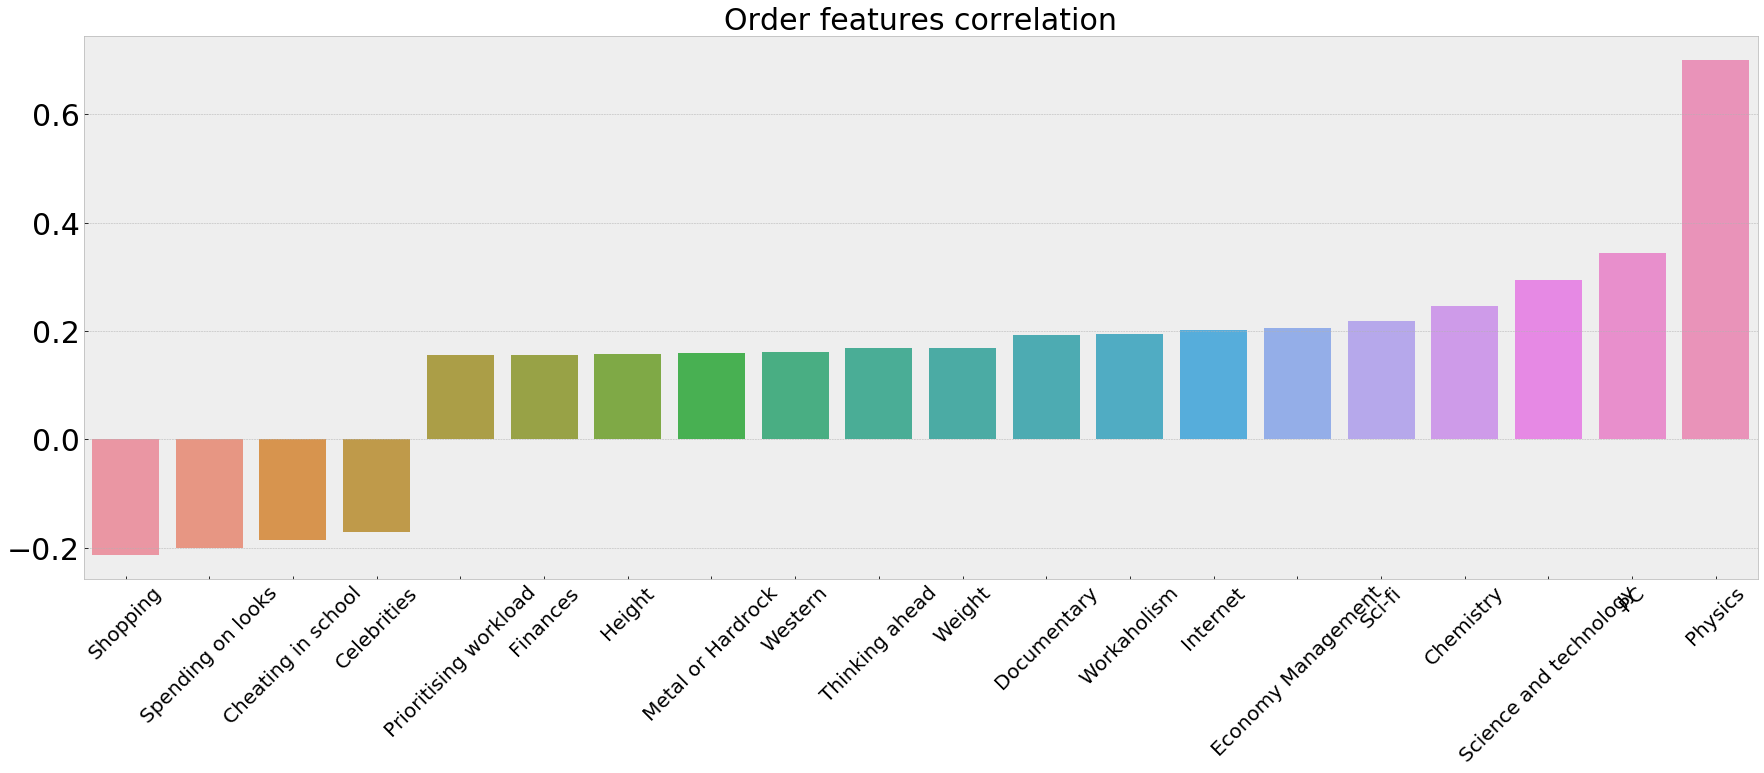

In [143]:
corrs_area = correlation_plot(var_of_interest, young, False)
plt.show()

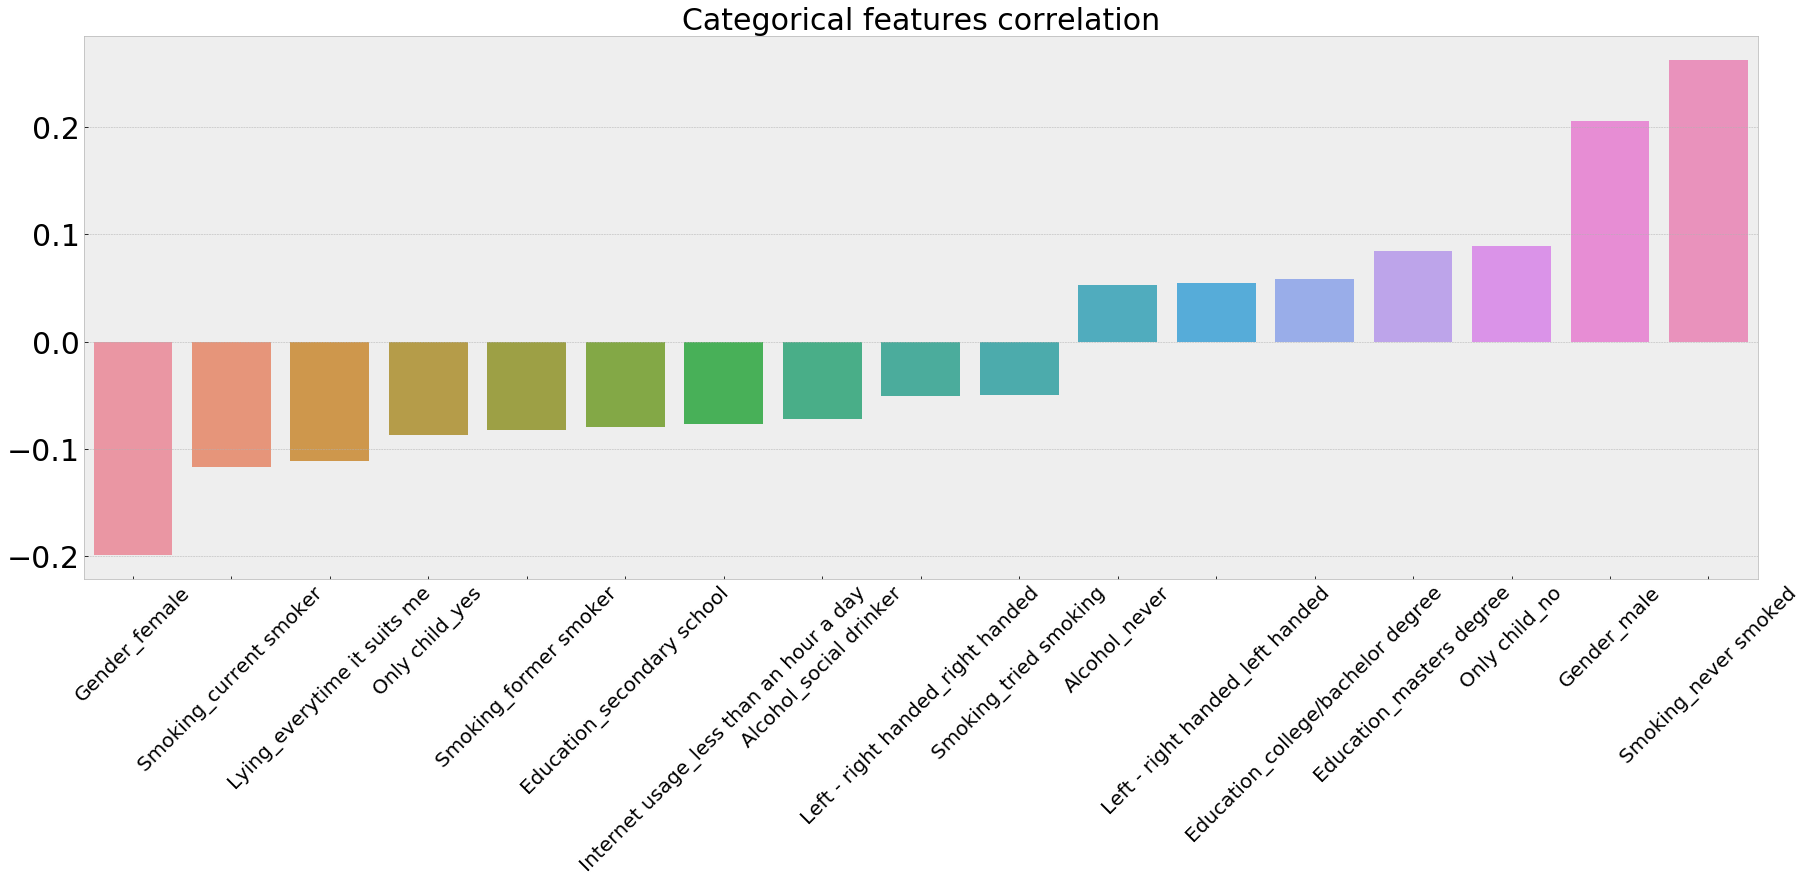

In [144]:
corrs_area = correlation_plot(var_of_interest, young, True)
plt.show()

In [145]:
corr = young.corr()
os = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
display(os[abs(os)>0.5])
drop_colinera_cols = os[abs(os)>0.5].reset_index()['level_1']

Biology              Medicine             0.716247
Height               Weight               0.716145
Mathematics          Physics              0.702560
Fantasy/Fairy tales  Animated             0.701055
Biology              Chemistry            0.700857
Shopping             Shopping centres     0.652790
Chemistry            Medicine             0.622158
Classical music      Opera                0.618511
Snakes               Rats                 0.577865
Rock                 Metal or Hardrock    0.559022
Metal or Hardrock    Punk                 0.548505
Art exhibitions      Theatre              0.546576
Horror               Thriller             0.521622
Shopping             Spending on looks    0.513460
Internet             PC                   0.510916
dtype: float64

In [146]:
clean_data = young.dropna(subset=[var_of_interest])
features_int = [col for col in clean_data.columns if clean_data[col].dtype!='object']
features_cats = [col for col in clean_data.columns if clean_data[col].dtype=='object']

features_int = list(set(features_int) - set(drop_colinera_cols))
print('Number of features {:.0f}'.format(len(features_int)))

Number of features 125


In [147]:
X = clean_data[features_int]
mean_values = X.mean(axis=0)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)
#X_cats = clean_data[features_cats].drop(var_of_interest, 1)
#X_cats = X_cats.drop('House - block of flats', 1)
#X_cats = pd.get_dummies(X_cats)
#print(X.shape)
#print(X_cats.shape)

In [148]:
from sklearn.model_selection import train_test_split
mapping={1.0:0, 5.0:1}
Y = clean_data[var_of_interest]
for key, val in mapping.items():
    Y.replace(key,val, inplace = True)
X.drop('Mathematics', axis=1, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=100)

In [149]:
# standardization
#from sklearn.preprocessing import StandardScaler
##scaler = StandardScaler()
#scaler.fit(x_train)
#x_train=scaler.transform(x_train)
#x_test=scaler.transform(x_test)

In [150]:
# gridsearch for parameter tuning
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, precision_score

#param_grid = {'C':[.001,.01,.03,.1,.3,1,3,10]}
#grsearch = GridSearchCV(clr, param_grid=param_grid, cv=KF, scoring = 'f1')
#grsearch.fit(x_train, y_train)
#print(grsearch.best_params_)

# fitting logistic regression and evaluating
clr = LogisticRegression()
#clr = RidgeClassifier(alpha=100)
clr.fit(x_train, y_train)

#print('Average accuracy score on CV set: {:.2f}'.format(np.mean(cross_val_score(clr, x_train, y_train, cv=KF))))
#print('Average f1 on CV set: {:.2f}'.format(np.mean(cross_val_score(clr, x_train, y_train, cv=KF, scoring = 'f1'))))
print('')
print('Accuracy score on test set is: {:.2f}'.format(clr.score(x_test, y_test)))
recall = recall_score(y_test, clr.predict(x_test))
print ('Recall on test: {:.2f}'.format(recall))
precision = precision_score(y_test, clr.predict(x_test))
print ('Presicion on test: {:.2f}'.format(precision))
print ('F1 score on test: {:.2f}'.format((2*recall*precision /(recall + precision))))


Accuracy score on test set is: 0.80
Recall on test: 0.42
Presicion on test: 0.44
F1 score on test: 0.43


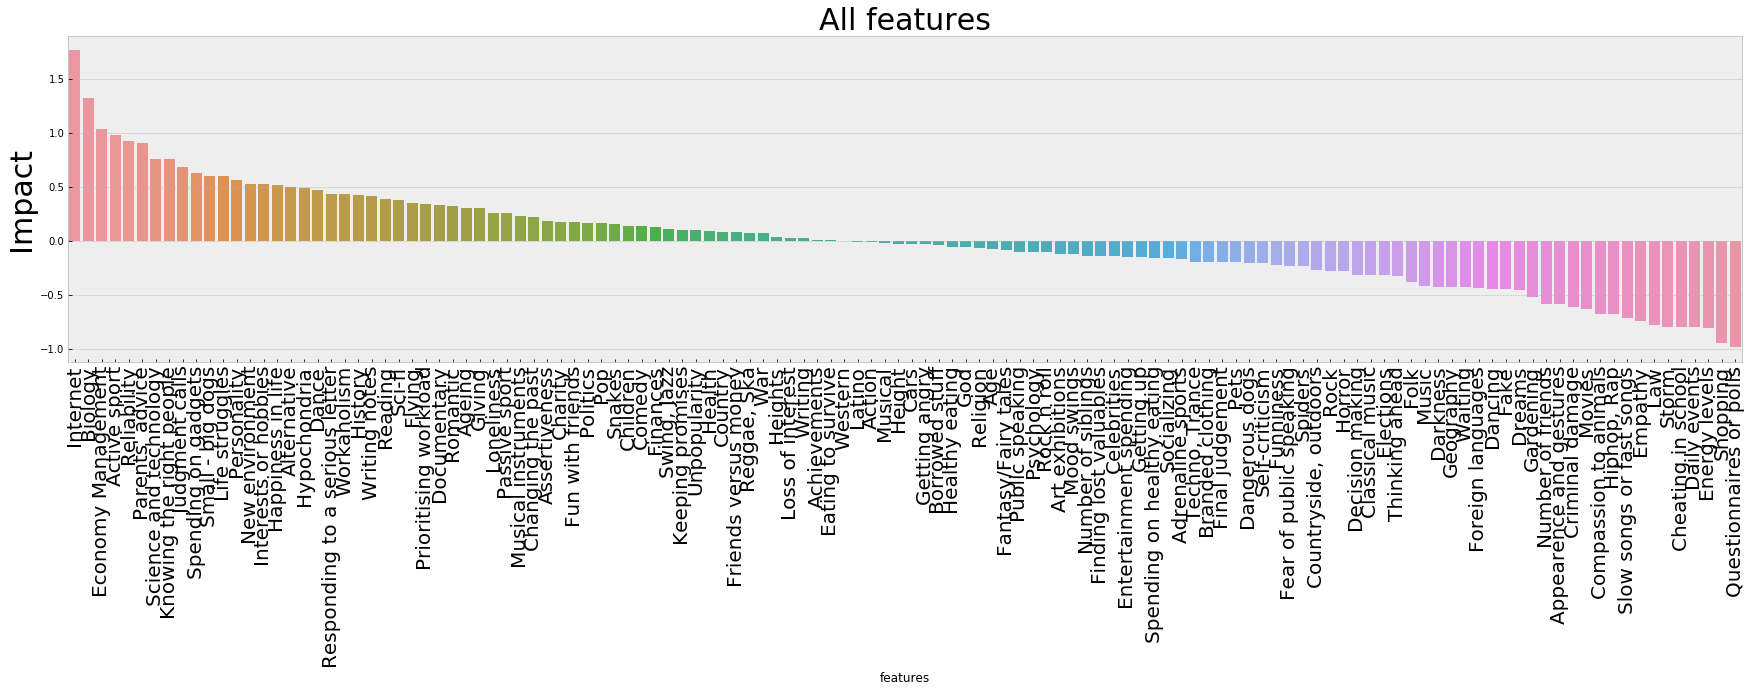

In [151]:
feat_coeff = pd.DataFrame({'features': X.columns,'impacts': clr.coef_[0]})
feat_coeff = feat_coeff.sort_values('impacts', ascending=False)

fig, ax1 = plt.subplots(1,1, figsize=(30,6))
sns.barplot(x=feat_coeff.features, y=feat_coeff.impacts, ax=ax1)
ax1.set_title('All features', size=30)
ax1.set_xticklabels(labels=feat_coeff.features, size=20, rotation=90)
ax1.set_ylabel('Impact', size=30)
plt.show()

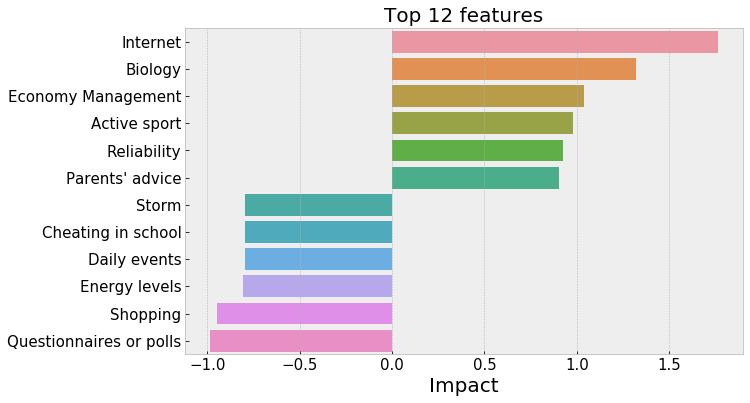

In [152]:
top10 = pd.concat([feat_coeff.head(6),feat_coeff.tail(6)])
fig, ax1 = plt.subplots(1,1, figsize=(10,6))
sns.barplot(y=top10.features, x=top10.impacts, ax=ax1)
ax1.set_title('Top 12 features', size=20)
ax1.set_yticklabels(labels=top10.features, size=15)
ax1.set_xlabel('Impact', size=20)
plt.xticks(fontsize=15)
plt.ylabel('')
plt.show()

# Young People Survey

<img src="outro.jpg" alt="outro" style="width: 500px;"/>